Текстовое описание датасета

Этот набор данных содержит 1294757 описаний объявлений с автомобилями.

Мы видим, что столбцы (признаки) имеют имена

 0   brand                 Марка автомобиля
 1   name                  Модель автомобиля
 2   bodyType              Тип кузова
 3   color                 Цвет
 4   fuelType              Тип топлива 
 5   year                  Год выпуска
 6   mileage               Пробег
 7   transmission          Коробка
 8   power                 Мощность
 9   price                 Цена 
 10  vehicleConfiguration  Комплектация
 11  engineName            Название двигателя
 12  engineDisplacement    Тип и объем двигателя
 13  date                  Дата публикации объявления
 14  location              Место нахождения автомобиля
 15  link                  Ссылка на объявление 
 16  description           Комментарий в объявлении
 17  parse_date            Дата получения данных

Признаки brand, name, bodyType, color, fuelType, transmission, vehicleConfiguration, engineName, engineDisplacement, location - номинальные (категориальные).

Признаки year, mileage, power, price - количественные.

Остальные признаки являются текстовыми.

Требуется оценить стоимость автомобиля по заданным признакам. То есть предсказать, какая будет рыночная цена.

Это задача регрессии.

In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from threading import Thread

Прочтем данные:

In [3]:
url = "C:/Users/Vladislav/Documents/archive/all_regions.csv"
data_raw = pd.read_csv(url)

In [4]:
data_raw.shape

(1294757, 18)

In [5]:
data_raw

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294752,BMW,X1,Джип 5 дв.,Серый,Дизель,NaN,275000.0,АКПП,177.0,1000000,NaN,NaN,NaN,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/bmw/x1/51154874.html,Продам автомобиль BMW X1 2d в идеальном состоя...,2023-06-01 21:00:00
1294753,Лада,2105,Седан,Белый,Бензин,1985.0,300000.0,Механика,64.0,165000,1.3 MT5 21050,ВАЗ-2105,1.3 LTR,2023-06-01 00:00:00,Усть-Джегута,https://ust-dzheguta.drom.ru/lada/2105/5114990...,продаю автомобиль изо не надобности автомобиль...,2023-06-01 13:00:00
1294754,Toyota,Camry,Седан,Серый,Бензин,2020.0,32000.0,АКПП,202.0,3100000,2.5 AT SE,A25A-FKS,2.5 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/toyota/camry/5115596...,"Америнка,в отличном состоянии,любые проверки. ...",2023-06-01 20:00:00
1294755,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,298000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 23:00:00


In [6]:
data_raw.head(15)

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
5,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,966900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007643.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-02 20:00:00
6,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,992900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007640.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-01 22:00:00
7,Лада,Нива Легенд,Джип 3 дв.,Белый,Бензин,NaN,NaN,Механика,83.0,972900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/niva_legend/500076...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-01 22:00:00
8,Лада,Гранта,Лифтбек,Черный,Бензин,NaN,NaN,Механика,90.0,942900,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50007643.html,Модель: Гранта Комплектация: LADA (ВАЗ) Granta...,2023-05-01 22:00:00
9,Chevrolet,Niva,Джип 5 дв.,Зеленый,Бензин,2002.0,220000.0,Механика,80.0,450000,1.7 MT L,ВАЗ-2123,1.7 LTR,2023-04-03 00:00:00,Майкоп,https://maykop.drom.ru/chevrolet/niva/50388675...,Продам шевика в хорошем состоянии. Гнили нет о...,2023-05-02 00:00:00


In [7]:
data_raw.tail()

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
1294752,BMW,X1,Джип 5 дв.,Серый,Дизель,NaN,275000.0,АКПП,177.0,1000000,NaN,NaN,NaN,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/bmw/x1/51154874.html,Продам автомобиль BMW X1 2d в идеальном состоя...,2023-06-01 21:00:00
1294753,Лада,2105,Седан,Белый,Бензин,1985.0,300000.0,Механика,64.0,165000,1.3 MT5 21050,ВАЗ-2105,1.3 LTR,2023-06-01 00:00:00,Усть-Джегута,https://ust-dzheguta.drom.ru/lada/2105/5114990...,продаю автомобиль изо не надобности автомобиль...,2023-06-01 13:00:00
1294754,Toyota,Camry,Седан,Серый,Бензин,2020.0,32000.0,АКПП,202.0,3100000,2.5 AT SE,A25A-FKS,2.5 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/toyota/camry/5115596...,"Америнка,в отличном состоянии,любые проверки. ...",2023-06-01 20:00:00
1294755,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,298000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 23:00:00
1294756,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,320000,1.7 MT,ВАЗ-21213,1.7 LTR,2023-06-01 00:00:00,Черкесск,https://cherkessk.drom.ru/lada/2121_4x4_niva/5...,"Нива в хорошем состоянии, без гнили, лонжероны...",2023-06-01 21:00:00


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294757 entries, 0 to 1294756
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   brand                 1294757 non-null  object 
 1   name                  1294757 non-null  object 
 2   bodyType              1294757 non-null  object 
 3   color                 1257029 non-null  object 
 4   fuelType              1289815 non-null  object 
 5   year                  724644 non-null   float64
 6   mileage               771799 non-null   float64
 7   transmission          1289563 non-null  object 
 8   power                 1273353 non-null  float64
 9   price                 1294757 non-null  int64  
 10  vehicleConfiguration  724647 non-null   object 
 11  engineName            720976 non-null   object 
 12  engineDisplacement    717625 non-null   object 
 13  date                  1294757 non-null  object 
 14  location              1294757 non-

Найдем признаки с категориальным типом и преобразуем их

In [9]:
data_raw['brand'] = data_raw['brand'].astype('category')
data_raw['bodyType'] = data_raw['bodyType'].astype('category')
data_raw['color'] = data_raw['color'].astype('category')
data_raw['fuelType'] = data_raw['fuelType'].astype('category')
data_raw['transmission'] = data_raw['transmission'].astype('category')
data_raw['engineName'] = data_raw['engineName'].astype('category')
data_raw['vehicleConfiguration'] = data_raw['vehicleConfiguration'].astype('category')
data_raw['location'] = data_raw['location'].astype('category')
data_raw['engineDisplacement'] = data_raw['engineDisplacement'].astype('category')
data_raw['name'] = data_raw['name'].astype('category')

In [10]:
data_raw['brand'].dtype

CategoricalDtype(categories=['AC', 'AITO', 'Acura', 'Alfa Romeo', 'Alpina', 'Aro', 'Asia',
                  'Aston Martin', 'Audi', 'Avatr',
                  ...
                  'ЗАЗ', 'ЗИЛ', 'ЗиС', 'ИЖ', 'Лада', 'ЛуАЗ', 'Москвич',
                  'Прочие авто', 'ТагАЗ', 'УАЗ'],
, ordered=False, categories_dtype=object)

In [11]:
data_raw['bodyType'].dtype

CategoricalDtype(categories=['Джип 3 дв.', 'Джип 5 дв.', 'Купе', 'Лифтбек', 'Минивэн',
                  'Открытый', 'Пикап', 'Седан', 'Универсал', 'Хэтчбек 3 дв.',
                  'Хэтчбек 5 дв.'],
, ordered=False, categories_dtype=object)

In [12]:
data_raw['color'].dtype

CategoricalDtype(categories=['Бежевый', 'Белый', 'Бордовый', 'Голубой', 'Желтый',
                  'Зеленый', 'Золотистый', 'Коричневый', 'Красный',
                  'Оранжевый', 'Розовый', 'Серебристый', 'Серый', 'Синий',
                  'Фиолетовый', 'Черный'],
, ordered=False, categories_dtype=object)

In [13]:
data_raw['fuelType'].dtype

CategoricalDtype(categories=['Бензин', 'Дизель', 'Электро'], ordered=False, categories_dtype=object)

In [14]:
data_raw['transmission'].dtype

CategoricalDtype(categories=['АКПП', 'Автомат', 'Вариатор', 'Механика', 'Робот'], ordered=False, categories_dtype=object)

In [15]:
data_raw['engineDisplacement'].dtype

CategoricalDtype(categories=['0.5 LTR', '0.6 LTR', '0.7 LTR', '0.8 LTR', '0.9 LTR',
                  '1.0 LTR', '1.1 LTR', '1.2 LTR', '1.3 LTR', '1.4 LTR',
                  '1.5 LTR', '1.6 LTR', '1.7 LTR', '1.8 LTR', '1.9 LTR',
                  '2.0 LTR', '2.1 LTR', '2.2 LTR', '2.3 LTR', '2.4 LTR',
                  '2.5 LTR', '2.6 LTR', '2.7 LTR', '2.8 LTR', '2.9 LTR',
                  '3.0 LTR', '3.1 LTR', '3.2 LTR', '3.3 LTR', '3.4 LTR',
                  '3.5 LTR', '3.6 LTR', '3.7 LTR', '3.8 LTR', '3.9 LTR',
                  '4.0 LTR', '4.1 LTR', '4.2 LTR', '4.3 LTR', '4.4 LTR',
                  '4.5 LTR', '4.6 LTR', '4.7 LTR', '4.8 LTR', '4.9 LTR',
                  '5.0 LTR', '5.2 LTR', '5.3 LTR', '5.4 LTR', '5.5 LTR',
                  '5.6 LTR', '5.7 LTR', '5.8 LTR', '5.9 LTR', '6.0 LTR',
                  '6.1 LTR', '6.2 LTR', '6.3 LTR', '6.4 LTR', '6.5 LTR',
                  '6.6 LTR', '6.7 LTR', '6.8 LTR', '7.0 LTR', '7.6 LTR',
                  '8.0 LTR', '8.1 LTR', 

In [16]:
data_raw['name'].dtype

CategoricalDtype(categories=['001', '009', '05', '09', '1-Series', '100', '1007', '100NX',
                  '107', '11',
                  ...
                  'Таврия', 'ТагАЗ', 'Тагер', 'Форца', 'Х-Кросс 5', 'Х-рей',
                  'Х-рей Кросс', 'Хантер', 'Чайка', 'Шанс'],
, ordered=False, categories_dtype=object)

In [17]:
data_raw['engineName'].dtype

CategoricalDtype(categories=[' \tMDC.BE', ' 2GR-FSE', ' A16LET', ' BM15L', '1.5 Ecoboost',
                  '1.6 Ecoboost', '10HM', '10P, 15P', '10S', '12A',
                  ...
                  'УЗАМ-412Э', 'УМЗ 4218', 'УМЗ 4218.10', 'УМЗ-414',
                  'УМЗ-4178', 'УМЗ-4178.10', 'УМЗ-421.10', 'УМЗ-4213.10',
                  'УМЗ-4218', 'УМЗ-4218.10'],
, ordered=False, categories_dtype=object)

In [18]:
data_raw['vehicleConfiguration'].dtype

CategoricalDtype(categories=[' 1.0 CILQ G Package SAIII', ' 1.0 CILQ G Package SAIII 4WD',
                  ' 1.0 CILQ SAIII', ' 1.0 Custom G', ' 1.0 Custom G ',
                  ' 1.0 Custom G 4WD', ' 1.0 Custom G Limited II SAIII',
                  ' 1.0 Custom G Limited II SAIII 4WD',
                  ' 1.0 Custom G Limited SAIII',
                  ' 1.0 Custom G Limited SAIII 4WD',
                  ...
                  'xDrive50 Suite Sport', 'xDriveM50i', 'ГАЗ-21Р', 'ГАЗ-22',
                  'ГАЗ-М-21В', 'ГАЗ-М-21Г', 'ГАЗ-М-21И', 'ГАЗ-М-21Л',
                  'Т21С15-МТ2', 'Х5 М'],
, ordered=False, categories_dtype=object)

In [19]:
data_raw['location'].dtype

CategoricalDtype(categories=['1-го отделения совхоза Масловский', 'Абадзехская', 'Абаза',
                  'Абакан', 'Абан', 'Абатское', 'Абдулино', 'Абинск',
                  'Абрау-Дюрсо', 'Авдон',
                  ...
                  'Яшкино', 'Яшкуль', 'Яя', 'дачный Мочище', 'им. Бабушкина',
                  'им. Карла Либкнехта', 'им. Свердлова', 'им. Тельмана',
                  'имени 9 Января', 'совхоза Раменское'],
, ordered=False, categories_dtype=object)

2. Визуализируем, анализируем, боремся с выбросами (outliers)

Выведем статистику по всем признакам датасета

In [20]:
data_raw.describe()

,year,mileage,power,price
count,724644.000000,771799.000000,1.273353e+06,1.294757e+06
mean,2009.684535,154893.397115,1.415560e+02,1.444358e+06
std,9.367108,100738.336936,6.563943e+01,1.970257e+06
min,1936.000000,1000.000000,1.000000e+00,2.700000e+02
25%,2003.000000,82000.000000,9.800000e+01,4.250000e+05
50%,2011.000000,144000.000000,1.280000e+02,8.700000e+05
75%,2017.000000,211000.000000,1.630000e+02,1.765000e+06
max,2023.000000,1000000.000000,1.000000e+03,1.500000e+08


In [21]:
data_raw.describe(include=['category'])

,brand,name,bodyType,color,fuelType,transmission,vehicleConfiguration,engineName,engineDisplacement,location
count,1294757,1294757,1294757,1257029,1289815,1289563,724647,720976,717625,1294757
unique,160,2223,11,16,3,5,26874,4219,69,3400
top,Toyota,Гранта,Джип 5 дв.,Белый,Бензин,АКПП,1.5 CVT Стандарт,1NZ-FE,1.5 LTR,Москва
freq,265598,33536,427108,321170,1173467,511032,5262,17826,139732,115771


Понятно, что цена автомобиля в первую очередь зависит от его года выпуска. Построим поэтому диаграмму рассеивания для двух признаков: price и year.

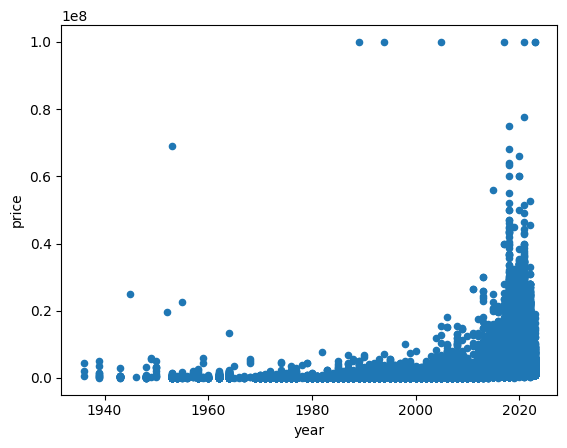

In [22]:
data_raw.plot(kind='scatter', x='year', y='price')
pass

Теперь постороим диаграмму рассеивания для двух признаков: price и power.

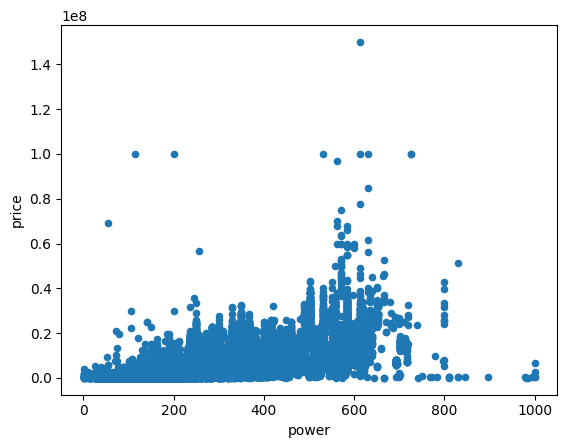

In [23]:
data_raw.plot(kind='scatter', x='power', y='price')
pass

Теперь постороим диаграмму рассеивания для двух признаков: price и mileage.

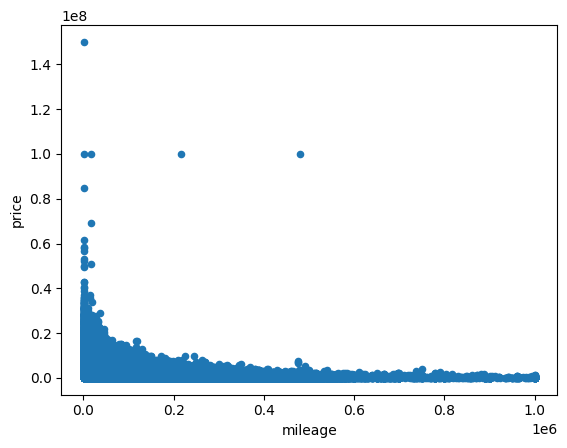

In [24]:
data_raw.plot(kind='scatter', x='mileage', y='price')
pass

Построим все диаграммы рассеивания:

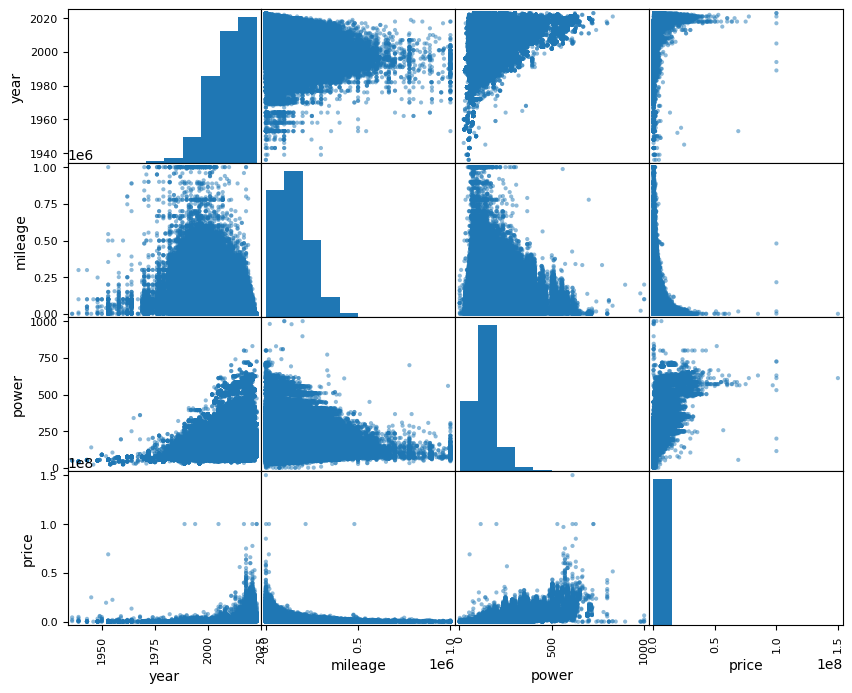

In [25]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 8))
pass

Выведем матрицу корреляции датасета

In [26]:
corr_mat = data_raw.corr(numeric_only=True)
corr_mat

,year,mileage,power,price
year,1.000000,-0.513488,0.202671,0.494491
mileage,-0.513488,1.000000,-0.022772,-0.365223
power,0.202671,-0.022772,1.000000,0.608741
price,0.494491,-0.365223,0.608741,1.000000


Визуализируем:

<Axes: >

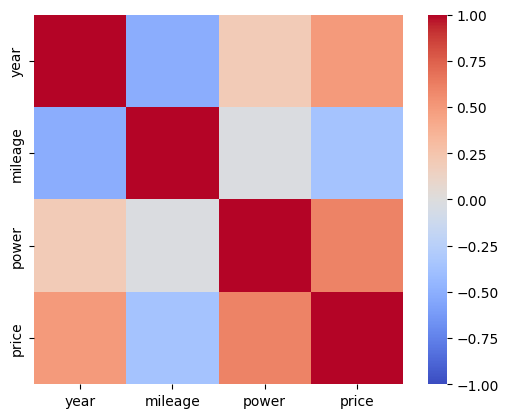

In [27]:
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

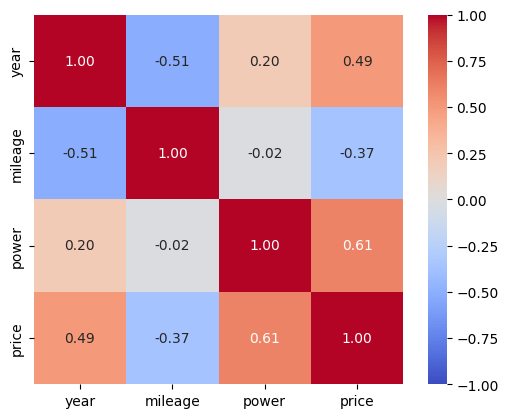

In [28]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Видно, что из всех значимых признаков больше всех прослеживается корреляция цены с признаком power (мощность)

Выведем коэффициенты корреляции, большие заданного значения:

In [29]:
corr_mat > 0.4

,year,mileage,power,price
year,True,False,False,True
mileage,False,True,False,False
power,False,False,True,True
price,True,False,True,True


In [30]:
data_raw[data_raw['price'] > 50000000]

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
416347,Toyota,Crown,Седан,Белый,Бензин,1989.0,216000.0,АКПП,200.0,99999999,3.0 royal saloon (column),7M-GE,3.0 LTR,2023-05-19 00:00:00,Комсомольск-на-Амуре,https://komsomolsk.drom.ru/toyota/crown/492403...,"зимняя новая резина, сигнализация StarLine под...",2023-05-19 18:00:00
758048,Lamborghini,Urus,Джип 5 дв.,Желтый,Бензин,2022.0,NaN,АКПП,666.0,52800000,4.0 AT S,NaN,NaN,2023-05-08 00:00:00,Новосибирск,https://novosibirsk.drom.ru/lamborghini/urus/5...,"Новый автомобиль, срок поставки 3 недели. Сало...",2023-05-09 01:00:00
869610,BMW,5-Series,Седан,Черный,Бензин,1994.0,480000.0,Механика,115.0,99999999,518i MT,M43B18,1.8 LTR,2023-05-08 00:00:00,Суксун,https://suksun.drom.ru/bmw/5-series/50835836.html,BOOM.ер. На ходу. Двигатель в очень хорошем со...,2023-05-09 01:00:00
874256,Kia,Mohave,Джип 5 дв.,Белый,Дизель,NaN,1000.0,Автомат,257.0,56790000,NaN,NaN,NaN,2023-05-30 00:00:00,Пермь,https://perm.drom.ru/kia/mohave/51128768.html,.АВТОКРЕДИТ БЕЗ ПЕРВОГО ВЗНОСА.АВТООБМЕН - ДОП...,2023-06-04 14:00:00
1081628,Rolls-Royce,Phantom,Седан,Фиолетовый,Бензин,NaN,1000.0,Автомат,571.0,53022720,NaN,NaN,NaN,2023-05-01 00:00:00,Москва,https://moscow.drom.ru/rolls-royce/phantom/503...,Rolls-Royce Phantom в наличии. 2018 год Цвет к...,2023-05-02 04:00:00
1084793,Mercedes-Benz,S-Class,Седан,NaN,Бензин,2021.0,NaN,АКПП,612.0,77607000,Mercedes-Maybach S680 4MATIC,M 279 E 60 AL,6.0 LTR,2023-05-02 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/s-class/4...,3D комбинация приборов MANUFAKTUR пакет кожи M...,2023-05-02 17:00:00
1097359,Mercedes-Benz,S-Class,Седан,Черный,Бензин,NaN,1000.0,АКПП,630.0,85000000,NaN,NaN,NaN,2023-05-08 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/s-class/5...,«ЛУКАВТО» – официальный дилер Mercedes-Benz в ...,2023-05-08 18:00:00
1101683,Bugatti,Veyron,Купе,NaN,Бензин,2005.0,18000.0,Робот,NaN,99999999,8.0 DSG Veyron 16.4,NaN,NaN,2023-05-11 00:00:00,Москва,https://moscow.drom.ru/bugatti/veyron/50871436...,Bugatti Veyron Год выпуска: 2007 Пробег: 18.00...,2023-05-12 00:00:00
1103429,Mercedes-Benz,G-Class,Джип 5 дв.,Зеленый,Бензин,NaN,NaN,Автомат,585.0,55000000,NaN,NaN,NaN,2023-05-11 00:00:00,Москва,https://moscow.drom.ru/mercedes-benz/g-class/5...,Модель: G-Class Комплектация: G-Class AMG G 63...,2023-05-11 02:00:00
1103939,Rolls-Royce,Cullinan,Джип 5 дв.,NaN,Бензин,2018.0,NaN,АКПП,571.0,74999999,6.8 AT 4WD,N74B68,6.7 LTR,2023-05-12 00:00:00,Москва,https://moscow.drom.ru/rolls-royce/cullinan/50...,NaN,2023-05-12 17:00:00


In [31]:
data_raw[data_raw['power'] > 900]

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
41870,Прочие авто,Россия и СНГ,Открытый,Белый,Бензин,NaN,200000.0,Механика,1000.0,430000,NaN,NaN,NaN,2023-05-19 00:00:00,Раздольное,https://razdolnoe-krym.drom.ru/other/rus/50946...,"Продам Газель в отличном состоянии. На газу, г...",2023-05-20 04:00:00
62317,Лада,4x4 2121 Нива,Джип 3 дв.,Зеленый,Бензин,NaN,101000.0,Механика,1000.0,190000,NaN,NaN,NaN,2023-05-10 00:00:00,Чульман,https://chulman.drom.ru/lada/2121_4x4_niva/464...,"Продам ниву. Не гнилая, свеже крашена,есть кот...",2023-05-15 18:00:00
66873,Прочие авто,Россия и СНГ,Минивэн,Белый,Бензин,NaN,22000.0,Механика,981.0,80000,NaN,NaN,NaN,2023-05-26 00:00:00,Нерюнгри,https://neryungri.drom.ru/other/rus/51066857.html,"Нужно сделать электрику, настроить трамблер пр...",2023-05-29 21:00:00
135657,Лада,2114 Самара,Хэтчбек 5 дв.,Черный,Бензин,NaN,NaN,Механика,985.0,135000,NaN,NaN,NaN,2023-06-08 00:00:00,Языково,https://yazykovo-ufa.drom.ru/lada/2114/5044906...,Продаётся ваз 2114 в хорошем состоянии не биты...,2023-06-08 14:00:00
400925,Nissan,GT-R,Купе,Синий,Бензин,NaN,NaN,Автомат,1000.0,6500000,NaN,NaN,NaN,2023-06-21 00:00:00,Ставрополь,https://stavropol.drom.ru/nissan/gt-r/46844974...,Расчётная мощность 1000 л/с Пожалуйста не срав...,2023-06-21 17:00:00
419140,Toyota,Cresta,Седан,Серый,Бензин,NaN,100000.0,Механика,1000.0,2500000,NaN,NaN,NaN,2023-05-24 00:00:00,Хабаровск,https://habarovsk.drom.ru/toyota/cresta/489747...,СОБСТВЕННИК* * 15 лет в моих руках . * 180 ЛС ...,2023-05-25 08:00:00
681645,SsangYong,Istana,Минивэн,Зеленый,Дизель,NaN,NaN,Механика,995.0,430000,NaN,NaN,NaN,2023-06-21 00:00:00,Кемерово,https://kemerovo.drom.ru/ssang_yong/istana/506...,хорошие состояния на 4,2023-06-21 15:00:00
923521,Лада,Приора,Универсал,Черный,Бензин,NaN,140000.0,Механика,979.0,419000,NaN,NaN,NaN,2023-04-29 00:00:00,Берёзовский,https://berezovskiy-sverd.drom.ru/lada/priora/...,"ОДИН СОБСТВЕНИК, МАКСИМАЛЬНАЯ КОМПЛЕКТАЦИЯ, ОР...",2023-05-02 04:00:00


Обнаружим выбросы:

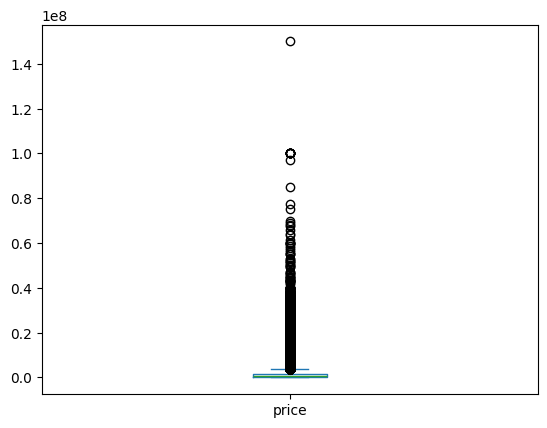

In [32]:
data_raw['price'].plot(kind='box')
pass

In [33]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       47000.0
0.010       59000.0
0.050      120000.0
0.100      195000.0
0.500      870000.0
0.900     3190000.0
0.950     4270900.0
0.990     9000000.0
0.995    12800000.0
Name: price, dtype: float64

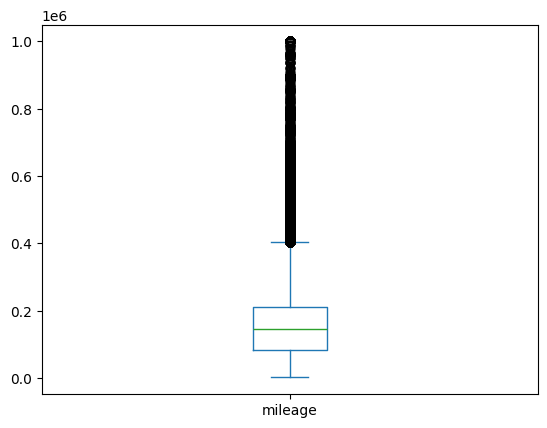

In [34]:
data_raw['mileage'].plot(kind='box')
pass

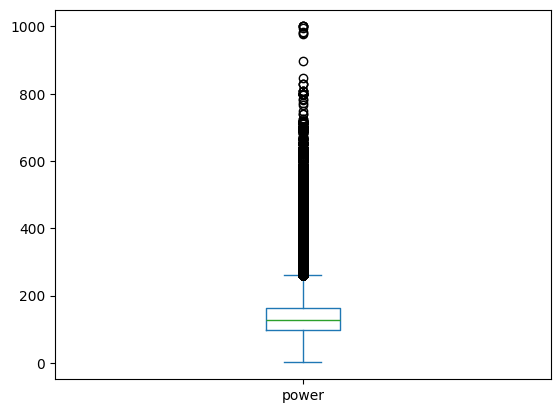

In [35]:
data_raw['power'].plot(kind='box')
pass

In [36]:
data_raw['price'].quantile([0.0005,.01,.05,.1,.5,.9,.95,.99,.9999])

0.0005       26189.0
0.0100       59000.0
0.0500      120000.0
0.1000      195000.0
0.5000      870000.0
0.9000     3190000.0
0.9500     4270900.0
0.9900     9000000.0
0.9999    35000786.6
Name: price, dtype: float64

Удалим все строки таблицы, в которых 'price' выходят за пределы квантилей 0.0005, 0.9995.

In [37]:
rows_to_drop = data_raw[
    (data_raw['price'] < data_raw['price'].quantile(0.0005)) | (data_raw['price'] > data_raw['price'].quantile(0.9999))].index
data = data_raw.drop(rows_to_drop)
data.shape

(1293979, 18)

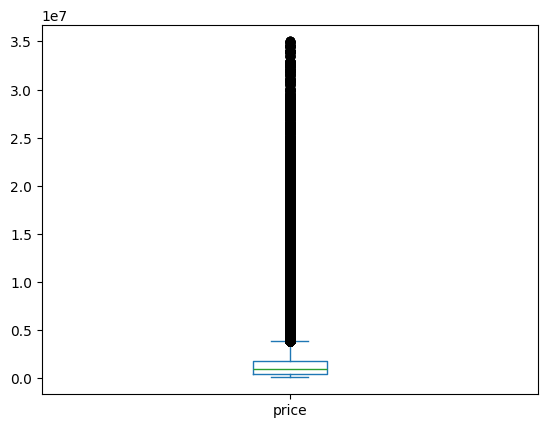

In [38]:
data['price'].plot(kind='box')
pass

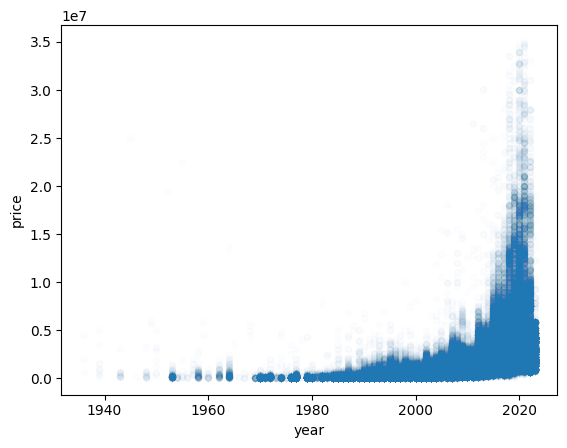

In [39]:
data.plot(kind='scatter', x='year', y='price', alpha=.01)
pass

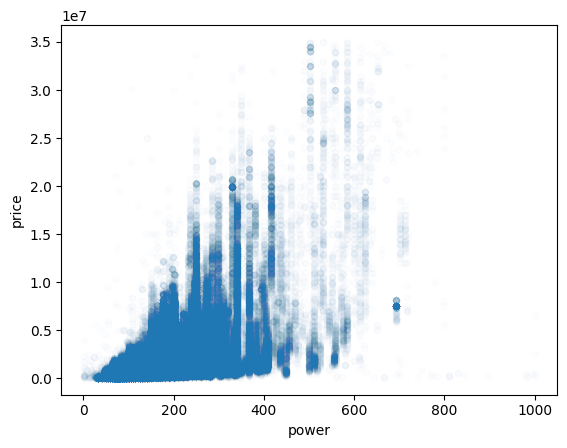

In [40]:
data.plot(kind='scatter', x='power', y='price', alpha=.01)
pass

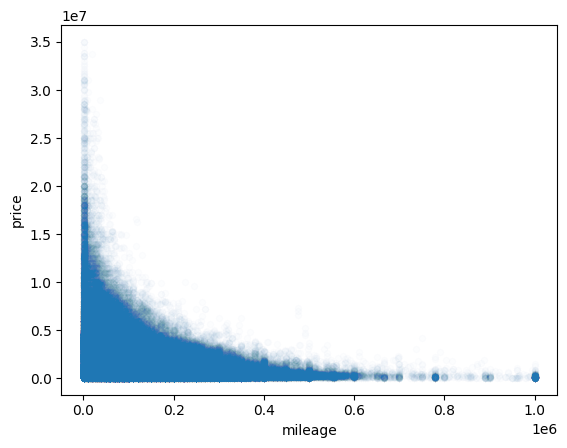

In [41]:
data.plot(kind='scatter', x='mileage', y='price', alpha=.01)
pass

In [42]:
data['bodyType'].value_counts().index

CategoricalIndex(['Джип 5 дв.', 'Седан', 'Хэтчбек 5 дв.', 'Минивэн',
                  'Универсал', 'Лифтбек', 'Джип 3 дв.', 'Хэтчбек 3 дв.',
                  'Пикап', 'Купе', 'Открытый'],
                 categories=['Джип 3 дв.', 'Джип 5 дв.', 'Купе', 'Лифтбек', ..., 'Седан', 'Универсал', 'Хэтчбек 3 дв.', 'Хэтчбек 5 дв.'], ordered=False, dtype='category', name='bodyType')

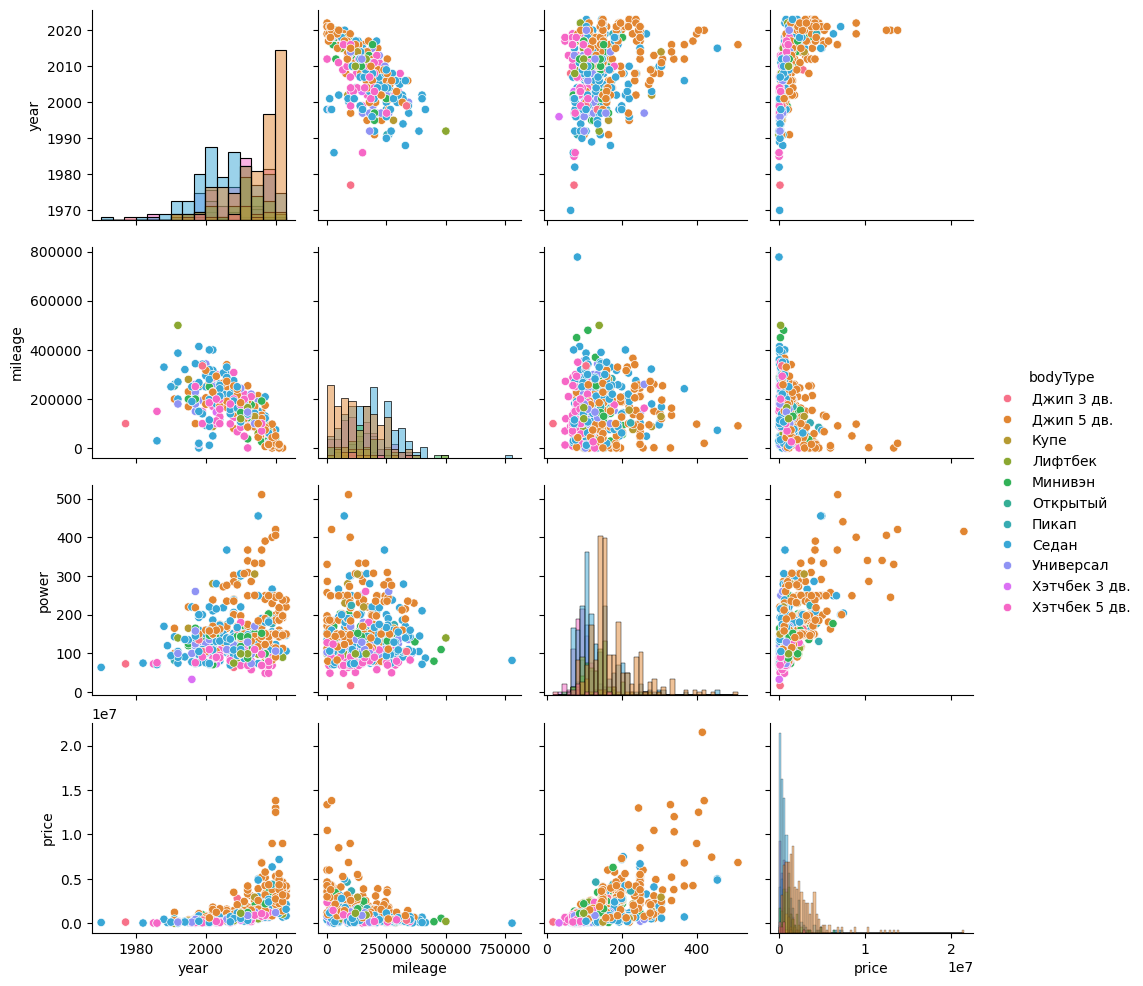

In [43]:
sns.pairplot(data.sample(1000), hue='bodyType', diag_kind='hist')
pass

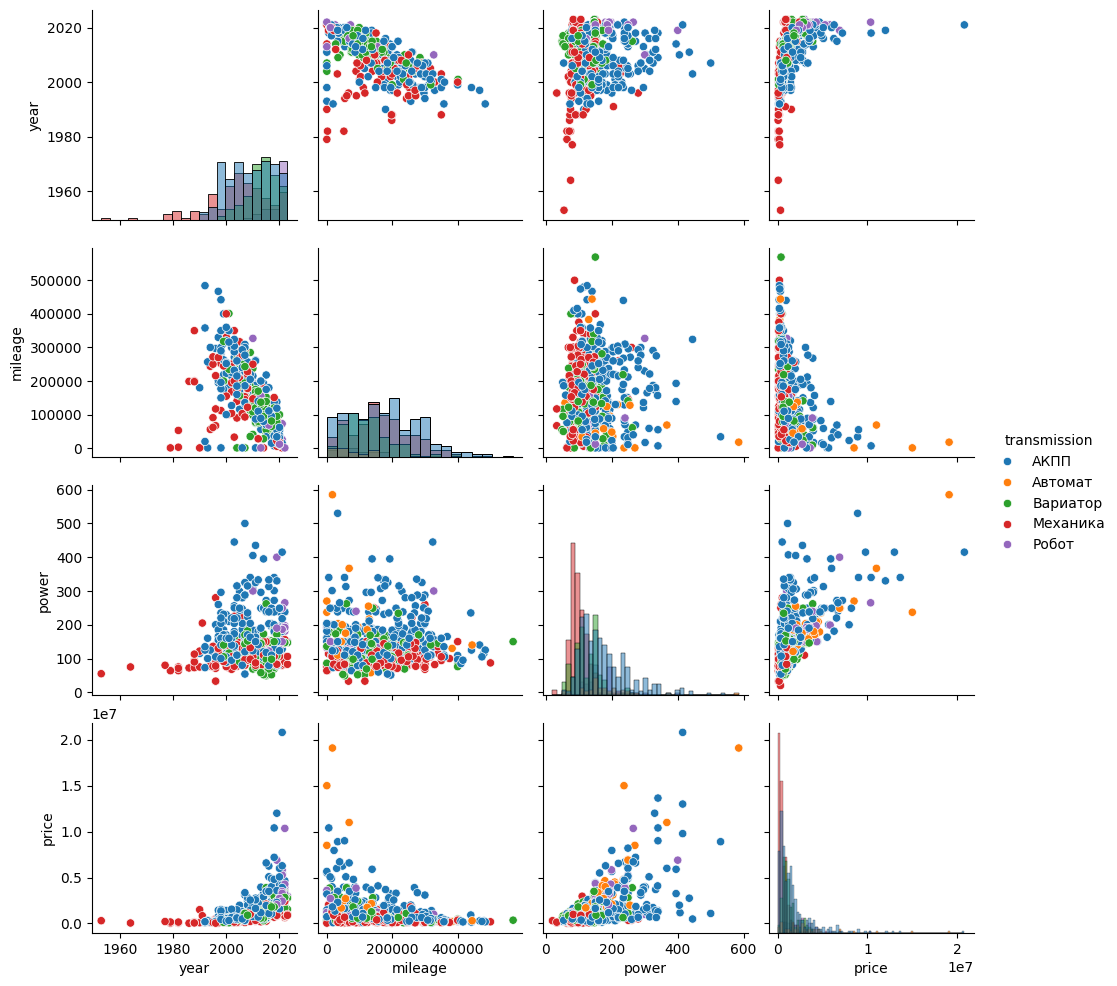

In [44]:
sns.pairplot(data.sample(1000), hue='transmission', diag_kind='hist')
pass

Обработаем пропущенные значения:

In [45]:
data.isnull().sum()

brand                        0
name                         0
bodyType                     0
color                    37644
fuelType                  4926
year                    569787
mileage                 522643
transmission              5175
power                    21377
price                        0
vehicleConfiguration    569784
engineName              573450
engineDisplacement      576801
date                         0
location                     0
link                         0
description              40304
parse_date                   0
dtype: int64

Информация в столбце description написана "от руки", поэтому большого значения не будет иметь. Его следует удалить. 
Некоторые признаки имеют большое количество пропущенных значений, особенно признаки engineName, vehicleConfiguration. Кроме того, признак engineDisplacement частично отражает суть этих признака. Поэтому для оптимальной обработки датасета исключим признаки engineName, vehicleConfiguration из таблицы.

In [46]:
data = data.drop(["engineName", "vehicleConfiguration", "description", ], axis = 1)

In [47]:
data.isnull().sum()

brand                      0
name                       0
bodyType                   0
color                  37644
fuelType                4926
year                  569787
mileage               522643
transmission            5175
power                  21377
price                      0
engineDisplacement    576801
date                       0
location                   0
link                       0
parse_date                 0
dtype: int64

Заполним медианами пропущенные значения в столбцах, соответствующих количественным признакам:

In [48]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[['year', 'mileage', 'power']])

SimpleImputer(strategy='median')

In [49]:
data[['year', 'mileage', 'power']] = imp_num.transform(data[['year', 'mileage', 'power']])

In [50]:
data.isnull().sum()

brand                      0
name                       0
bodyType                   0
color                  37644
fuelType                4926
year                       0
mileage                    0
transmission            5175
power                      0
price                      0
engineDisplacement    576801
date                       0
location                   0
link                       0
parse_date                 0
dtype: int64

Заполним наиболее частыми значения в столбцах, соответствующих категориальным признакам/ Еще можно ввести новый признак - индикатор пропущенного значения (легко сделать при бинаризации ниже).

In [51]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[['color', 'fuelType', 'transmission', 'engineDisplacement']])

SimpleImputer(strategy='most_frequent')

In [52]:
data[['color', 'fuelType', 'transmission', 'engineDisplacement']] = imp_cat.transform(data[['color', 'fuelType', 'transmission', 'engineDisplacement']])

In [53]:
data.isnull().sum()

brand                 0
name                  0
bodyType              0
color                 0
fuelType              0
year                  0
mileage               0
transmission          0
power                 0
price                 0
engineDisplacement    0
date                  0
location              0
link                  0
parse_date            0
dtype: int64

Обработка категориальных признаков

Ко всем категориальным признакам будем применять метод бинаризации (one-hot encoding).

Все признаки имеют большое количество значений, особенно признак name, поэтому при добавлении дополнительных столбцов таблица получится очень громоздкой. Кроме того, остальные признаки частично отражают суть первого. Поэтому для оптимальной обработки датасета исключим признак industry из таблицы. Также для нас не имеет значения столбцы link, date, parse_date, поэтому их удалим. Местоположение (location) тоже удаляем, потому что их много, возьмем в среднем по России за 23 год.

In [54]:
data = data.drop(["name", "link", "parse_date", "location", "date"], axis = 1)

In [55]:
data

,brand,bodyType,color,fuelType,year,mileage,transmission,power,price,engineDisplacement
0,Volkswagen,Хэтчбек 5 дв.,Серебристый,Бензин,2011.0,240000.0,Механика,101.0,280000,1.5 LTR
1,Лада,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.7 LTR
2,Toyota,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 LTR
3,Лада,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 LTR
4,Лада,Джип 3 дв.,Зеленый,Бензин,2011.0,144000.0,Механика,83.0,1022900,1.5 LTR
...,...,...,...,...,...,...,...,...,...,...
1294752,BMW,Джип 5 дв.,Серый,Дизель,2011.0,275000.0,АКПП,177.0,1000000,1.5 LTR
1294753,Лада,Седан,Белый,Бензин,1985.0,300000.0,Механика,64.0,165000,1.3 LTR
1294754,Toyota,Седан,Серый,Бензин,2020.0,32000.0,АКПП,202.0,3100000,2.5 LTR
1294755,Лада,Джип 3 дв.,Белый,Бензин,1995.0,354000.0,Механика,79.0,298000,1.7 LTR


In [56]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data[['brand', 'bodyType', 'color', 'fuelType', 'transmission', 'engineDisplacement']])

C:\Users\Vladislav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [57]:
OneHotEncoder(drop='if_binary', sparse=False)

OneHotEncoder(drop='if_binary', sparse=False)

In [58]:
dummies = pd.DataFrame(enc.transform(data[['brand', 'bodyType', 'color', 'fuelType', 'transmission', 'engineDisplacement']]), 
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,brand_AC,brand_AITO,brand_Acura,brand_Alfa Romeo,brand_Alpina,brand_Aro,brand_Asia,brand_Aston Martin,brand_Audi,brand_Avatr,...,engineDisplacement_6.5 LTR,engineDisplacement_6.6 LTR,engineDisplacement_6.7 LTR,engineDisplacement_6.8 LTR,engineDisplacement_7.0 LTR,engineDisplacement_7.6 LTR,engineDisplacement_8.0 LTR,engineDisplacement_8.1 LTR,engineDisplacement_8.3 LTR,engineDisplacement_8.4 LTR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
data = pd.concat((data, dummies), axis=1).drop(['brand', 'bodyType', 'color', 'fuelType', 'transmission', 'engineDisplacement'], axis=1)


In [60]:
data

,year,mileage,power,price,brand_AC,brand_AITO,brand_Acura,brand_Alfa Romeo,brand_Alpina,brand_Aro,...,engineDisplacement_6.5 LTR,engineDisplacement_6.6 LTR,engineDisplacement_6.7 LTR,engineDisplacement_6.8 LTR,engineDisplacement_7.0 LTR,engineDisplacement_7.6 LTR,engineDisplacement_8.0 LTR,engineDisplacement_8.1 LTR,engineDisplacement_8.3 LTR,engineDisplacement_8.4 LTR
0,2011.0,240000.0,101.0,280000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1996.0,37000.0,33.0,95000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002.0,295000.0,87.0,380000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018.0,16000.0,106.0,795000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011.0,144000.0,83.0,1022900,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294752,2011.0,275000.0,177.0,1000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294753,1985.0,300000.0,64.0,165000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294754,2020.0,32000.0,202.0,3100000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294755,1995.0,354000.0,79.0,298000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Нормализация

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)

In [62]:
data.describe()

,year,mileage,power,price,brand_AC,brand_AITO,brand_Acura,brand_Alfa Romeo,brand_Alpina,brand_Aro,...,engineDisplacement_6.5 LTR,engineDisplacement_6.6 LTR,engineDisplacement_6.7 LTR,engineDisplacement_6.8 LTR,engineDisplacement_7.0 LTR,engineDisplacement_7.6 LTR,engineDisplacement_8.0 LTR,engineDisplacement_8.1 LTR,engineDisplacement_8.3 LTR,engineDisplacement_8.4 LTR
count,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,...,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06,1.293979e+06
mean,-6.664406e-15,1.032335e-18,2.758752e-17,2.011956e-17,-5.511738e-19,1.015862e-18,-1.142158e-17,-4.327023e-18,-9.348676e-19,1.068028e-18,...,-1.732457e-18,-6.630559e-18,8.401453e-19,3.459422e-19,3.857530e-19,1.434562e-19,4.447828e-19,-5.511738e-19,-9.348676e-19,-8.909384e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.057148e+01,-1.918810e+00,-2.159508e+00,-7.443829e-01,-8.790965e-04,-1.243231e-03,-1.725168e-02,-1.132709e-02,-8.790965e-04,-2.637298e-03,...,-1.758195e-03,-3.045293e-03,-1.243231e-03,-2.325876e-03,-1.522641e-03,-8.790965e-04,-1.243231e-03,-8.790965e-04,-8.790965e-04,-8.790965e-04
25%,-3.847695e-02,-3.657361e-01,-6.667227e-01,-5.345517e-01,-8.790965e-04,-1.243231e-03,-1.725168e-02,-1.132709e-02,-8.790965e-04,-2.637298e-03,...,-1.758195e-03,-3.045293e-03,-1.243231e-03,-2.325876e-03,-1.522641e-03,-8.790965e-04,-1.243231e-03,-8.790965e-04,-8.790965e-04,-8.790965e-04
50%,1.038609e-01,-8.335906e-02,-2.050364e-01,-3.002357e-01,-8.790965e-04,-1.243231e-03,-1.725168e-02,-1.132709e-02,-8.790965e-04,-2.637298e-03,...,-1.758195e-03,-3.045293e-03,-1.243231e-03,-2.325876e-03,-1.522641e-03,-8.790965e-04,-1.243231e-03,-8.790965e-04,-8.790965e-04,-8.790965e-04
75%,2.461988e-01,1.733473e-01,2.874289e-01,1.710290e-01,-8.790965e-04,-1.243231e-03,-1.725168e-02,-1.132709e-02,-8.790965e-04,-2.637298e-03,...,-1.758195e-03,-3.045293e-03,-1.243231e-03,-2.325876e-03,-1.522641e-03,-8.790965e-04,-1.243231e-03,-8.790965e-04,-8.790965e-04,-8.790965e-04
max,1.811915e+00,1.090367e+01,1.321464e+01,1.767101e+01,1.137532e+03,8.043560e+02,5.796537e+01,8.828394e+01,1.137532e+03,3.791760e+02,...,5.687651e+02,3.283757e+02,8.043560e+02,4.299455e+02,6.567536e+02,1.137532e+03,8.043560e+02,1.137532e+03,1.137532e+03,1.137532e+03


Обучающая и тестовая выборки

Разобьем датасет на таблицы, одна из которых содержит классифицируемый признак, а другая все остальные, кроме него

In [63]:
X = data.drop(['price'], axis=1)
y = data['price']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(970484, 323495)

Обучение

Применим Метод 𝑘 ближайших соседей ( 𝑘 NN, 𝑘 nearest neighbours)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=10) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

In [129]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.1098528036439561,
 0.14236213192197847,
 0.8896704516007635,
 0.8594589189664228)

In [138]:
model.score(X_train, y_train)

0.8896704516007635

In [139]:
model.score(X_test, y_test)

0.8594589189664228

In [140]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(0.3314404978935979, 0.37730906684305704)

In [159]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['KNN-10, all features', :] = (RMSE_train, RMSE_test)

In [160]:
RMSE_table

,train,test
"KNN-10, all features",0.33144,0.377309


In [161]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['KNN-10, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"KNN-10, all features",0.88967,0.859459


Возьмем значение параметра n_neighbors = 7

In [66]:
model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [67]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [68]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.0962030885782821,
 0.13362040458715616,
 0.9033794043904898,
 0.8680888249192925)

In [69]:
model.score(X_train, y_train)

0.9033794043904898

In [70]:
model.score(X_test, y_test)

0.8680888249192925

In [71]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(0.31016622733347693, 0.365541248817635)

In [72]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['KNN-7, all features', :] = (RMSE_train, RMSE_test)

In [73]:
RMSE_table

,train,test
"KNN-7, all features",0.310166,0.365541


In [74]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['KNN-7, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"KNN-7, all features",0.903379,0.868089


In [75]:
model = KNeighborsRegressor(n_neighbors=3) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [76]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [77]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.07062685780969988,
 0.12328823428068048,
 0.9290666321793964,
 0.8782888294056747)

In [78]:
model.score(X_train, y_train)

0.9290666321793964

In [79]:
model.score(X_test, y_test)

0.8782888294056747

In [80]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

(0.26575714065608824, 0.3511242433679003)

In [81]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['KNN-3, all features', :] = (RMSE_train, RMSE_test)

In [82]:
RMSE_table

,train,test
"KNN-3, all features",0.265757,0.351124


In [83]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['KNN-3, all features', :] = (R2_train, R2_test)
R2_table

,train,test
"KNN-3, all features",0.929067,0.878289


In [84]:
model = KNeighborsRegressor(n_neighbors=1) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [ ]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
RMSE_train = (MSE_train)**(.5)
RMSE_test = (MSE_test)**(.5)
RMSE_train, RMSE_test

In [ ]:
RMSE_table = pd.DataFrame(columns=('train', 'test'))
RMSE_table.loc['KNN-1, all features', :] = (RMSE_train, RMSE_test)

In [ ]:
RMSE_table

In [ ]:
R2_table = pd.DataFrame(columns=('train', 'test'))
R2_table.loc['KNN-1, all features', :] = (R2_train, R2_test)
R2_table